In [10]:
from google.colab import drive
drive.mount('/gdrive')
#  %cd /gdrive/My Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [11]:
%cd /gdrive/My Drive

/gdrive/My Drive


In [12]:
# Fix randomness and hide warnings
seed = 42

# Filter warnings from keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(seed)
print(f"TensorFlow version {tf.__version__}")

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=14)
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

TensorFlow version 2.17.0


Exception ignored in: <function _xla_gc_callback at 0x7cb1e283f010>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [13]:
import numpy as np

data = np.load('training_set.npz')
X = data['images']
y = data['labels']


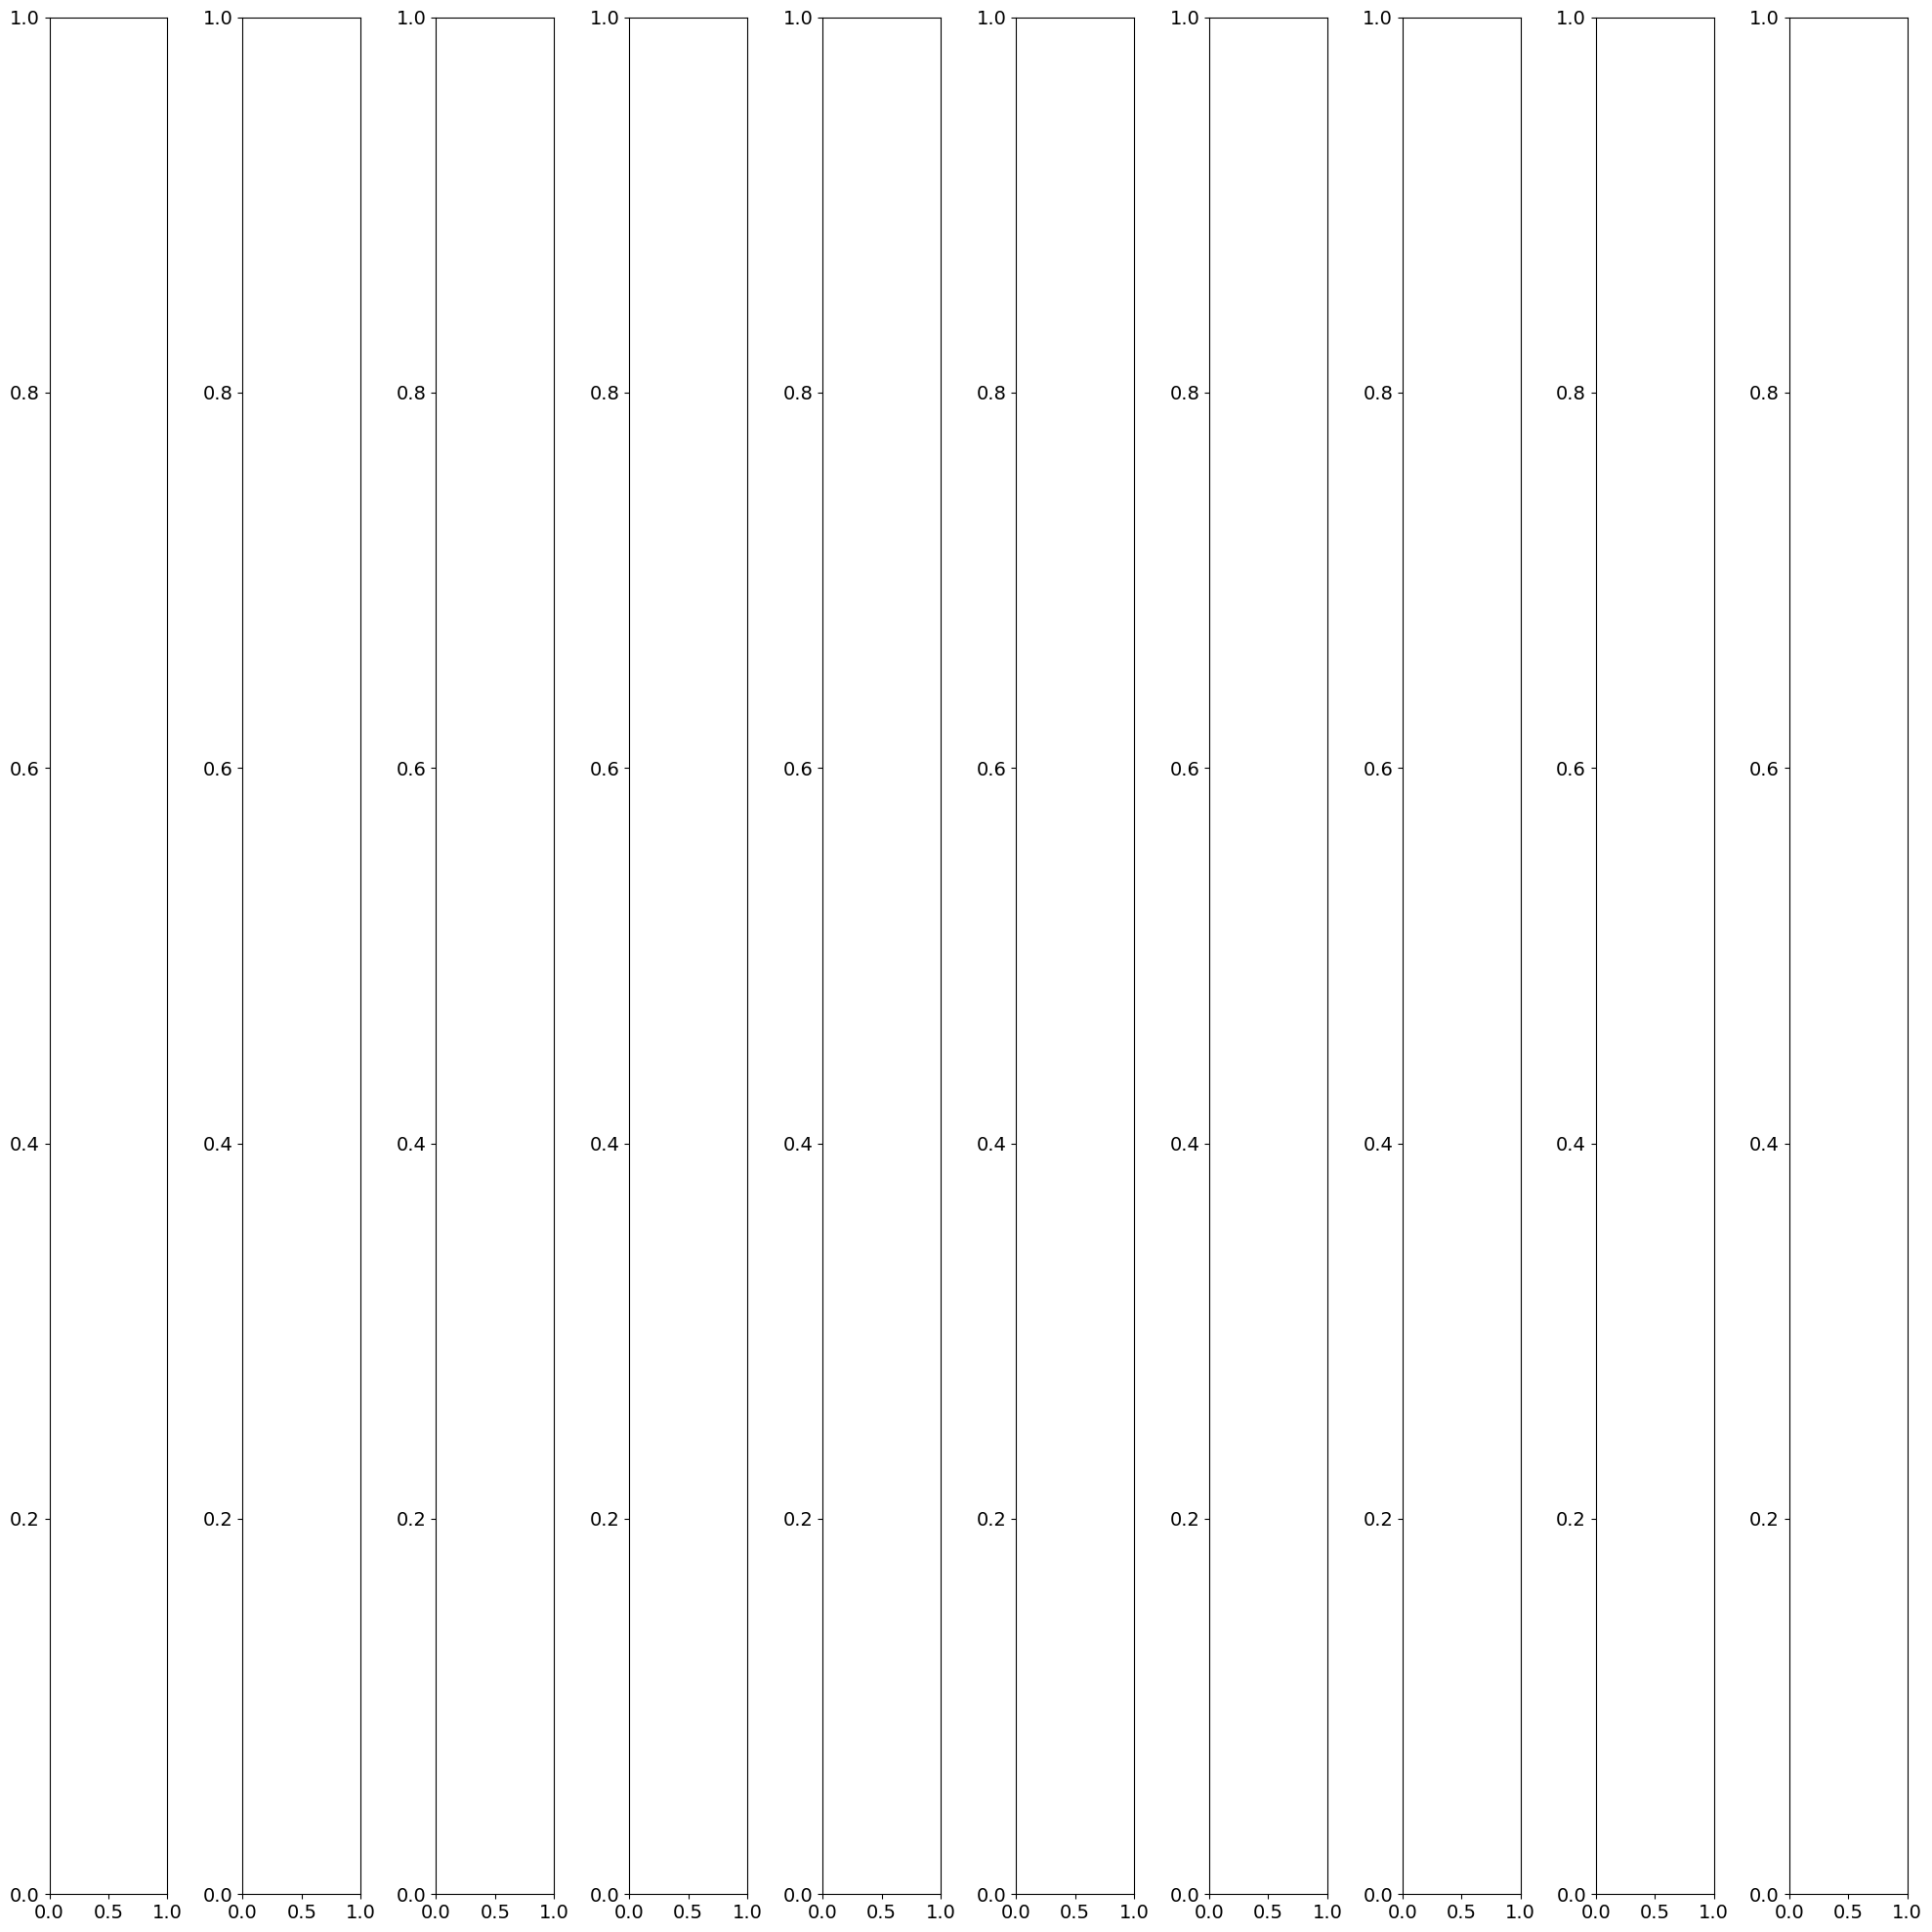

In [34]:
# Display a sample of images from the training-validation dataset
num_img = 10
random_indices = random.sample(range(len(X)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))
# Carica il dataset
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

# Adjust layout and display the images
plt.tight_layout()
plt.show()

In [35]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2530
1    2381
3    2226
7    1843
5    1393
2    1285
0    1052
4    1049
Name: count, dtype: int64


In [36]:

# Usa np.unique per trovare indici delle immagini uniche
_, unique_indices = np.unique(X.reshape(len(X), -1), axis=0, return_index=True)

# Estrai le immagini e le etichette corrispondenti agli indici unici
X_unique = X[unique_indices]
y_unique = y[unique_indices]



In [37]:
print('Counting occurrences of target classes:')
print(pd.DataFrame(y_unique, columns=['labels'])['labels'].value_counts())

Counting occurrences of target classes:
labels
6    2330
1    2179
3    2023
7    1643
2    1085
5     993
0     851
4     849
Name: count, dtype: int64


In [38]:
print(len(X_unique))

11953


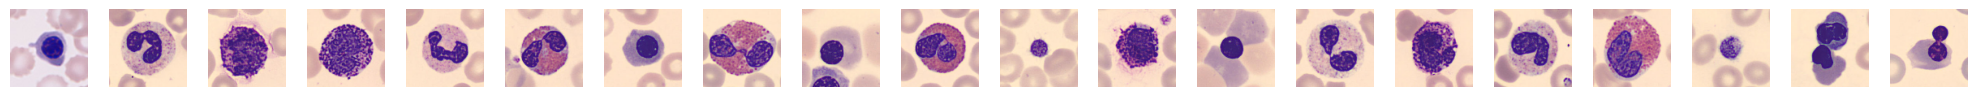

In [39]:
# Display a sample of images from the training-validation dataset
num_img = 20
random_indices = random.sample(range(len(X_unique)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

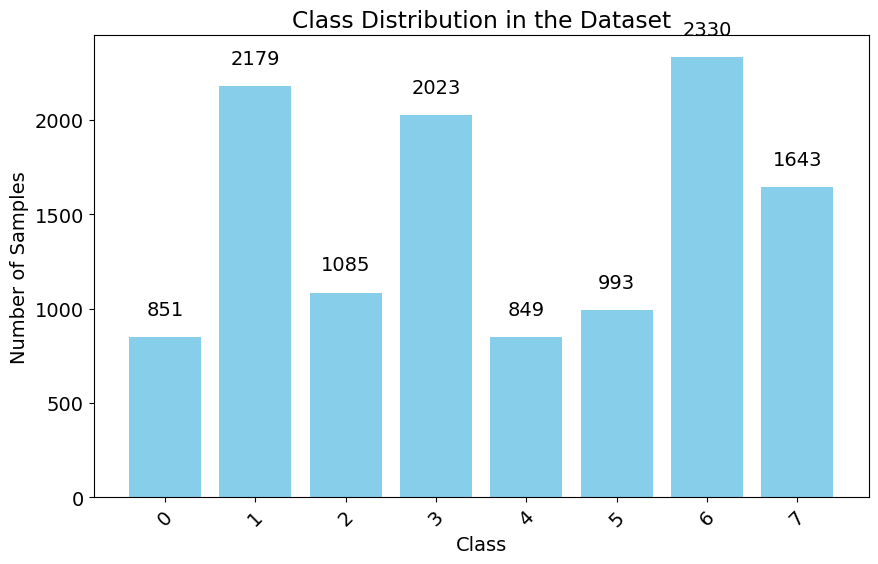

In [40]:
# Count occurrences of each class
classes, counts = np.unique(y_unique, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X = X_unique
y = y_unique

X_train, X_val, y_train, y_val = [], [], [], []

# Select exactly 'n' instances per class for validation
n = 125  # Set the number of validation instances per class
for class_label in np.unique(y):
    # Get all indices for the current class
    class_indices = np.where(y == class_label)[0]

    # Shuffle to ensure randomness in selection
    np.random.shuffle(class_indices)

    # Select n instances for the validation set
    val_indices = class_indices[:n]

    # Add selected validation instances to the validation list
    X_val.append(X[val_indices])
    y_val.append(y[val_indices])

    # The remaining instances are used for training
    train_indices = class_indices[n:]
    X_train.append(X[train_indices])
    y_train.append(y[train_indices])

# Combine the lists back into arrays
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_val = np.concatenate(X_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(10953, 96, 96, 3) (10953, 1)
(1000, 96, 96, 3) (1000, 1)


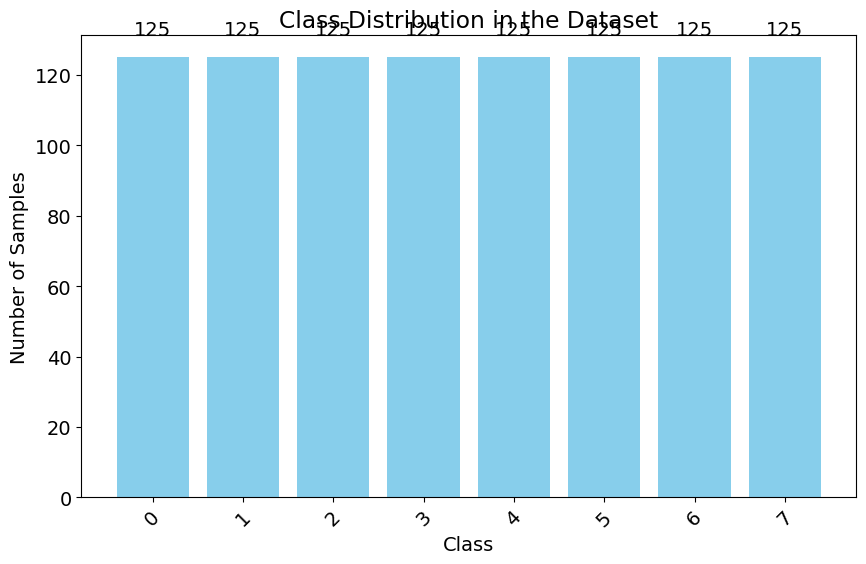

In [42]:
# Count occurrences of each class
classes, counts = np.unique(y_val, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

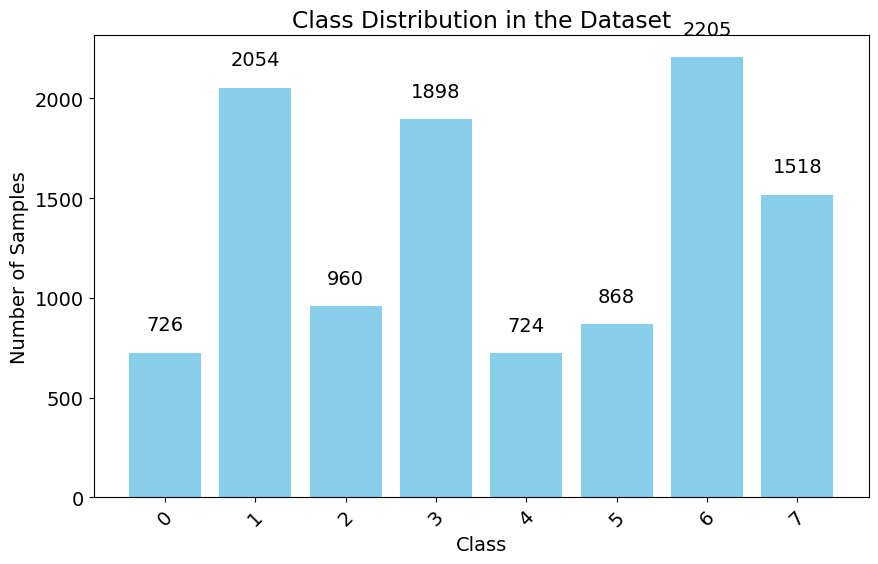

In [43]:
# Count occurrences of each class
classes, counts = np.unique(y_train, return_counts=True)

# Create a bar plot to show class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes.astype(str), counts, color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')

# Optionally, add the count value above each bar
for i in range(len(classes)):
    plt.text(classes[i], counts[i] + 0.05 * max(counts), str(counts[i]), ha='center')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()

In [44]:
#Transfer learning of EfficientNet
import keras
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness
from tensorflow.keras.optimizers import Adadelta

tf.keras.backend.clear_session()

#Import models
Effnet_1 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

Effnet_2 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

Effnet_3 = keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(96,96,3),
    pooling="avg",
    include_preprocessing=True,)

#change models name and avoid chaos
Effnet_1.name = 'Effnet_1'
Effnet_2.name = 'Effnet_2'
Effnet_3.name = 'Effnet_3'

#freeze models weights
Effnet_1.trainable = False
Effnet_2.trainable = False
Effnet_3.trainable = False

#define data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip('horizontal'),  # Flip images horizontally
    RandomRotation(0.3),  # Rotate images
    RandomContrast(0.3),  # Random contrast
    RandomBrightness(0.2),  # Random brightness
])

#add data augmentation layers to the base models
input_tensor = Input(shape=(96, 96, 3))
augmented_input_1 = data_augmentation(input_tensor)
augmented_input_2 = data_augmentation(input_tensor)
augmented_input_3 = data_augmentation(input_tensor)
Effnet_1_output = Effnet_1(augmented_input_1)
Effnet_2_output = Effnet_2(augmented_input_2)
Effnet_3_output = Effnet_3(augmented_input_3)

#concate model output
x = Concatenate()([Effnet_1_output,Effnet_2_output,Effnet_3_output])
x = Dense(1024, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

#build model
model = Model(inputs=input_tensor, outputs=x)

# Step 8: Compile the Model
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 96, 96, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetv2-s          │ (None, 1280)           │     20,331,360 │ sequential[0][0]       │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetv2-b2         │ (None, 1408)           │      8,769,374 │ sequential[0][0]       │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetv2-b3         │ (None, 1536)           │     12,930,622 │ sequential[0][0]       │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 4224)           │              0 │ efficientnetv2-s[0][0… │
│                           │                        │                │ efficientnetv2-b2[0][… │
│                           │                        │                │ efficientnetv2-b3[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │      4,326,400 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 8)              │          8,200 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 46,365,956 (176.87 MB)

 Trainable params: 4,334,600 (16.54 MB)

 Non-trainable params: 42,031,356 (160.34 MB)

(10953, 8)
(1000, 8)
Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 101s 247ms/step - accuracy: 0.1548 - loss: 2.1093 - val_accuracy: 0.2690 - val_loss: 1.9818
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 68s 164ms/step - accuracy: 0.3626 - loss: 1.8379 - val_accuracy: 0.3340 - val_loss: 1.8689
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.4565 - loss: 1.6781 - val_accuracy: 0.3860 - val_loss: 1.7554
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.5297 - loss: 1.5519 - val_accuracy: 0.4270 - val_loss: 1.6476
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.5646 - loss: 1.4493 - val_accuracy: 0.4540 - val_loss: 1.5464
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.6013 - loss: 1.3620 - val_accuracy: 0.4850 - val_loss: 1.4575
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.6224 - loss: 1.2841 - val_accuracy: 0.5140 - val_loss: 1.3759
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/ste

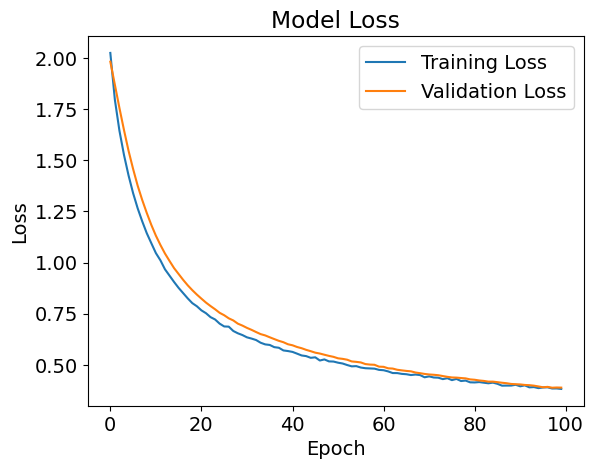

In [45]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Convert one-hot encoded labels to integer labels
if y_train.ndim > 1:
    y_int_train = np.argmax(y, axis=1)  # Flatten the one-hot labels to class indices
else:
    y_int_train = y_train  # Already in integer format

# Assuming `y_train` is the label array
class_weights = compute_class_weight('balanced', classes=np.unique(y_int_train), y=y_int_train)
class_weights = dict(enumerate(class_weights))

#convert target to categorical
from tensorflow.keras.utils import to_categorical
num_classes = 8  # Example number of classes

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

print(y_train.shape)
print(y_val.shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[early_stopping], class_weight=class_weights)

# Print the final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final training loss: {final_train_loss}")
print(f"Final validation loss: {final_val_loss}")

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [50]:
model.save("attempt_x.keras")

In [25]:
# file: model.py
from tensorflow.keras import layers, models
class Model:
    def __init__(self):
        self.model = keras.models.load_model("attempt_x.keras")
        # Add a new Dense layer (or any other layer you need)
        # Create a new model

    def predict(self, X):
        predicted_classes = np.argmax(self.model.predict(X), axis=-1)
        return predicted_classes
